# DATA 643 Project 5 | Implementing a Recommender System on Spark
### Ananya

Introduction

1. Collabarive filtering ia a popular algorthm in recomendation system world. Here we are taking rating dataset
   with attributes such as userId,itemId,rating,timestamp and volume of data is 600mb.
2. We will apply collabarative filtering using pyspark ALS and surprise pakage of python and evalute the performance between the two approaches.

In [42]:
# importing library for spark
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

In [43]:
# importing python library 
import datetime
import pandas as pd 
import numpy as np 
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBaseline
from surprise import  accuracy

In [19]:
file_location = "ratings1.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

DataFrame[userId: int, movieId: int, rating: double, timestamp: int]

### ALS

1. Apache Spark ML implements alternating least squares (ALS) for collaborative filtering, 
   a very popular algorithm for making recommendations.
   
2. ALS recommender is a matrix factorization algorithm that uses Alternating Least Squares
   with Weighted-Lamda-Regularization (ALS-WR). It factors the user to item matrix A into 
   the user-to-feature matrix U and the item-to-feature matrix M: It runs the ALS algorithm 
   in a parallel fashion.  The ALS algorithm should uncover the latent factors that explain
   the observed user to item ratings and tries to find optimal factor weights to minimize the 
   least squares between predicted and actual ratings.

df.collect()

In [20]:
df.count()

20000263

In [62]:
(training, test) = df.randomSplit([0.8, 0.2])


In [63]:
display(training)

DataFrame[userId: int, movieId: int, rating: double, timestamp: int]

In [64]:
display(training)

DataFrame[userId: int, movieId: int, rating: double, timestamp: int]

In [65]:
# Build the recommendation model using ALS on the training data
# Note we set cold start strategy to 'drop' to ensure we don't get NaN evaluation metrics
als = ALS(maxIter=5, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating",
          coldStartStrategy="drop")
model = als.fit(training)

In [66]:
start_time = datetime.datetime.now()
print (start_time)
model = als.fit(training)
end_time = datetime.datetime.now()
print (end_time)
print (end_time - start_time )


2020-07-04 21:36:07.614410
2020-07-04 21:37:15.132104
0:01:07.517694


In [67]:
showtime_start = strftime("%Y-%m-%d %H:%M:%S", gmtime())
print (showtime_start)
predictions = model.transform(test)
showtime_end = strftime("%Y-%m-%d %H:%M:%S", gmtime())
print (showtime_end)
print (end_time - start_time )

2020-07-05 01:37:23
2020-07-05 01:37:23
0:01:07.517694


In [68]:
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 0.8136887681887336


In [69]:
userRecs = model.recommendForAllUsers(10)

In [70]:
userRecs.collect()

[Row(userId=148, recommendations=[Row(movieId=96255, rating=17.48036766052246), Row(movieId=84131, rating=12.446399688720703), Row(movieId=86451, rating=12.446399688720703), Row(movieId=82051, rating=11.239225387573242), Row(movieId=99673, rating=10.768410682678223), Row(movieId=87884, rating=10.534032821655273), Row(movieId=83569, rating=9.906110763549805), Row(movieId=74159, rating=9.62655258178711), Row(movieId=106848, rating=9.235532760620117), Row(movieId=58094, rating=9.230792999267578)]),
 Row(userId=463, recommendations=[Row(movieId=96255, rating=12.21498966217041), Row(movieId=86451, rating=9.81665325164795), Row(movieId=84131, rating=9.81665325164795), Row(movieId=89632, rating=9.321026802062988), Row(movieId=93921, rating=9.132701873779297), Row(movieId=99673, rating=9.01720905303955), Row(movieId=116704, rating=8.971056938171387), Row(movieId=112907, rating=8.971056938171387), Row(movieId=120813, rating=8.839609146118164), Row(movieId=87884, rating=8.571769714355469)]),
 Ro

In [71]:
# Generate top 10 user recommendations for each movie
movieRecs = model.recommendForAllItems(10)

In [25]:
movieRecs.collect()

[Row(movieId=1580, recommendations=[Row(userId=8335, rating=5.731584548950195), Row(userId=35823, rating=5.356484413146973), Row(userId=114335, rating=5.319069862365723), Row(userId=43116, rating=5.163418769836426), Row(userId=112217, rating=5.064977645874023), Row(userId=133047, rating=4.928188323974609), Row(userId=33871, rating=4.7995195388793945), Row(userId=65874, rating=4.767269134521484), Row(userId=3569, rating=4.735748291015625), Row(userId=126249, rating=4.735567092895508)]),
 Row(movieId=6620, recommendations=[Row(userId=32785, rating=6.071186542510986), Row(userId=125207, rating=5.8110833168029785), Row(userId=137609, rating=5.602628231048584), Row(userId=22483, rating=5.484201431274414), Row(userId=24386, rating=5.358729362487793), Row(userId=27735, rating=5.285177707672119), Row(userId=44194, rating=5.093966007232666), Row(userId=45476, rating=5.069728851318359), Row(userId=88738, rating=5.068215370178223), Row(userId=85242, rating=5.054305076599121)]),
 Row(movieId=54190

In [72]:
training.count()

15997259

In [73]:
test.count()

4003004

In [3]:
data = pd.read_csv(r'ratings1.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


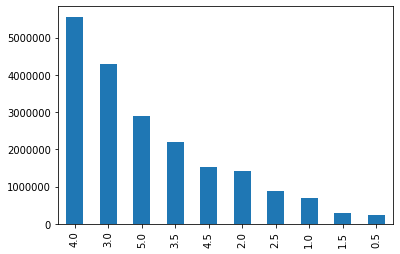

In [4]:
data.rating.value_counts().plot(kind='bar')
plt.show()

In [6]:
data.count()

userId       20000263
movieId      20000263
rating       20000263
timestamp    20000263
dtype: int64

In [7]:
data = data[['userId', 'movieId', 'rating', 'timestamp']]

In [8]:
data = data.iloc[:, :-1]
data.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [9]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [10]:
trainset, testset = train_test_split(data, test_size=0.20)

In [15]:
type(trainset)

surprise.trainset.Trainset

In [16]:
# setting k = 30 
sim_options = {'name': 'pearson_baseline',
               'min_support': 5,
               'user_based': True}
base_user = KNNBaseline(k=30,sim_options=sim_options)

In [ ]:
start_time = datetime.datetime.now()
print(start_time)
base_user .fit(trainset)
end_time = datetime.datetime.now()
print(end_time)
print(end_time - start_time)

2020-07-05 09:09:56.315861
Estimating biases using als...


### Observations 

1. when data value is very high 20000263 then sklearn will not work and kernel will request to restart.
2. However,in spark we can clearly see above spark engine is able to perform 1 min for traing the model and less than 
   1.5 sec to predict.
2. we wil take only 1058020 rows to apply surprise pakage and see how it is performing

In [35]:
data = pd.read_csv(r'ratings.csv')

In [41]:
data.size

1058020

In [22]:
data = data[['userId', 'movieId', 'rating', 'timestamp']]

In [23]:
data = data.iloc[:, :-1]
data.head()

,userId,movieId,rating
0,12882,1,4.0
1,12882,32,3.5
2,12882,47,5.0
3,12882,50,5.0
4,12882,110,4.5


In [24]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [25]:
trainset, testset = train_test_split(data, test_size=0.20)

In [26]:
# setting k = 30 
sim_options = {'name': 'pearson_baseline',
               'min_support': 5,
               'user_based': True}
base_user = KNNBaseline(k=30,sim_options=sim_options)

In [27]:
start_time = datetime.datetime.now()
print(start_time)
base_user .fit(trainset)
end_time = datetime.datetime.now()
print(end_time)
print(end_time - start_time)

2020-07-05 09:37:56.928511
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
2020-07-05 09:37:59.790991
0:00:02.862480


In [29]:
start_time = datetime.datetime.now()
base_user_preds = base_user.test(testset)
end_time = datetime.datetime.now()

In [30]:
accuracy.rmse(base_user_preds)

RMSE: 0.7767


0.776748703233153

### Conclusion

For the given recommender system’s data, algorithm(s), and (envisioned) implementation, 
at what point would you see moving to a distributed platform such as Spark becoming necessary?

I observed during the two implementation approaches that when the datasize volume became very high, performance of Spark 
implementation was much better compared to the other implementaion using python & scikit learn packages.
In few times, my kernel execution got stopped as the Python implementation could not handle the volume. 
Additionally, when an algorithm requires more iterative process as in this case, it is natural to use a distributed 
processing framework such as Spark.
This is because of the advantage of Spark's distributed architecture that splits the data into various executor nodes
and make possible for parallel execution. This also leads to building a scalable platform.

Execution within a Spark environment does not take much time to configure, particularly when we leverage any cloud 
platform such as Azure or AWS. Databricks is another popular platform which easily provides the spark platform via 
notebook to execute any spark code. This implementation can also be orchestrated so that manual execution can be prevented.

In order to acheive more performance in Spark implementation, we can leverage few basic functionalities such as caching.

In summary, i will always prefer to leverage Spark to build a high performance, scalable platform. 


